In [1]:
import numpy as np
from numpy import sin,cos,pi
import matplotlib.pyplot as plt

In [2]:
def setdefaults():
  plt.rcParams.update({'font.size': 22})
  plt.rcParams['lines.linewidth'] = 3

In [3]:
setdefaults()

In [4]:
from scipy.integrate import solve_ivp # import the ordinary differential equation integrator in Python

In [5]:
def bob_ode(t,r,l,k,m):
    """ Help documentation for "bob_ode"
     input is time, t (s) and r=[position p (m), angle (rad), velocity p (m/s), angle velocity (rad/s)] and time
     output is dr=[velocity p (m/s), angle velocity (rad/s), accel p (m/s/s), angle accel (rad/s/s)] at time, t
     the ODE is defined by:
    
    dr = f(t,r)"""
    #l=1
    #m=0.1 
    #k=20 
    g=9.81
    dr=np.zeros(np.size(r))
    dr[0]=r[2]
    dr[1]=r[3]
    
    # r[0] = position   dr[0] = velocity
    # r[1] = theta    dr[1] = theta_dot
    # r[2] = velocity  dr[2] = acceleration
    # r[3] = theta_dot   dr[3] = theta_ddot
    
    # your work here
    # theta_ddot = - x_ddot*cos(theta)/r - g*sin(theta)/r
    # x_ddot = - theta_ddot*r*cos(theta) + theta_dot^2*r*sin(theta)
    
    #A = np.array([[cos(r[1]), r], [1, l*cos(r[1])]])
    #B = np.array([[-g*sin(r[1])], [(r[3]**2)*l*sin(r[1])-(2*k*r[0]/m)]])
    #A = np.linalg.inv(A)
    
    #C = np.linalg.solve(A,B)
    #dr[2:3] = C
    #Minv=1/np.sin(r[1])
   
    if abs(r[1])<=0.0002:
        dr[2]=-2*k/m*r[0];
        dr[3]=-2*k*g/(2*k*l+m*g)*r[1];
    else:
        Minv=np.array([[1, -np.cos(r[1])/l],\
                   [-np.cos(r[1])/l,1/l**2]])*1/np.sin(r[1])**2
        #print(Minv)
        K=np.array([[m*l*r[3]**2*np.sin(r[1])-2*k/m*r[0]],[-g*l*sin(r[1])]]) # m*l*r[3]**2*np.sin(r[1]) set to 0
        #print(K)
        ddr=Minv@K
        dr[2:4]=ddr[:,0]
    #dr[3]= -g/l*np.sin(r[1])+r[3]**2/l*np.tan(r[1])-2*k/m/l*1/np.cos(r[1])
    return dr

In [6]:

bob_ode(0,[0,-pi/3,0,0],1,k,m)

NameError: name 'k' is not defined

In [8]:
l=1
m=0.1 
k=20 
g=9.81

r=[0,pi/6,0,0]
dr=np.zeros(np.shape(r))
Minv=np.array([[1/m, -np.cos(r[1])/m/l],\
           [-np.cos(r[1])/m/l,1/m/l**2]])* 1/(1-np.cos(r[1])**2)
print(Minv)
K=np.array([[m*l*r[3]**2*np.sin(r[1])-2*k*r[0]],[-m*g*l*np.sin(r[1])]])
print(K)
ddr=Minv@K
dr[2:4]=ddr[:,0]
print(ddr)
tx=m*l**2*r[3]**2*np.sin(r[1])-2*k*r[0]+m*g*l*np.sin(r[1])*np.cos(r[1])
tx/m/l/np.sin(r[1])**2
dr

[[ 40.         -34.64101615]
 [-34.64101615  40.        ]]
[[ 0.    ]
 [-0.4905]]
[[ 16.99141842]
 [-19.62      ]]


array([  0.        ,   0.        ,  16.99141842, -19.62      ])

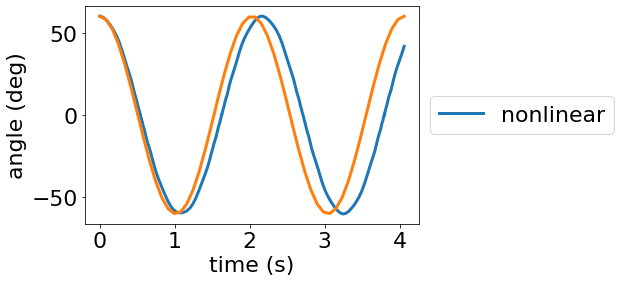

In [9]:
l=1
m=0.1 
k=20
g=9.81
P=2*pi/np.sqrt(2*k*g/(2*k*l+m*g))
t=np.linspace(0,2*P);
# your work
# your new solutions, convert rad to deg with 180/pi
A = pi/6
wn_20 = np.sqrt(2*g*k/((m*g) + (2*k*l)))
wn_inf = np.sqrt(g/l)
a_inf = A*cos(wn_inf*t) *(180/pi)
a_20 = A*cos(wn_20*t) * (180/pi)
#r=solve_ivp(bob_ode,np.linspace(0,2*P,100000),[0, pi/12,0,0],method='RK45'); # default = 'RK45'
r=solve_ivp(lambda t,r: bob_ode(t,r,l,k,m),[0,2*P],[0, pi/3,0,0],method='RK45'); # default = 'RK45'
plt.plot(r.t,r.y[1]*180/pi,label='nonlinear') # <-------------- your new plot, convert rad to deg with 180/pi
#plt.plot(t,a_20,'o',label='linear') # from problem 1
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('time (s)')
plt.ylabel('angle (deg)')

t=np.linspace(0,2*P);
# your work
# your new solutions, convert rad to deg with 180/pi
# a_inf = 
# a_20 = 


a_20 = pi/3*cos(np.sqrt(2*20*g/(2*20*l+m*g))*t)*180/pi

plt.plot(t,a_20,label='linear')

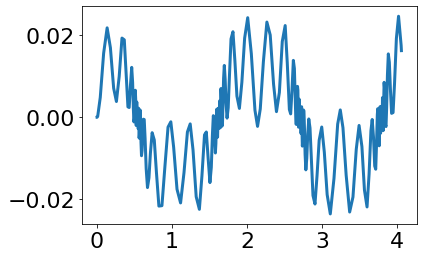

In [10]:
plt.plot(r.t,r.y[0])